## Setup

This guide was written in Python 3.6.

### Python & Pip

Download [Python](https://www.python.org/downloads/) and [Pip](https://pip.pypa.io/en/stable/installing/).


### Modules

We'll be needing different modules. Let's install the ones we'll need for this tutorial. Open up your terminal and enter the following commands to install the needed python modules: 

```
pip3 install ggplot
pip3 install seaborn 
pip3 install requests
pip3 install bokeh
pip3 install Image
pip3 install wordcloud
```

## Introduction

Unique data visualizations are more memorable. Most of the visualizations we've seen so far are kind of boring, especially if you have multiple of them. You're very quickly going to lose the attention of your audience. In this tutorial, we'll get into more specific and unique approaches. 

It's important to note that while these approaches definitely have applications, they're not as commonly used as bar graphs, line graphs, scatter plots, or even histograms. These basic visualization types can still be the best choice for certain, straightforward data stories. However, communicating complex topics — hierarchies, longitudinal data, and multi-variable comparisons, and so on — often involves more advanced visualizations. That's our focus for this tutorial. 

But before we go into code, let's overview some strategies for effective data visualization. 

### Less is More

Very often, when it comes to plotting, less is more. Data usually looks better "naked". What does this mean?

- Remove backgrounds

- Remove redundant labels

- Lighten your lines, or remove them!

- Reduce unnecessary colors

- Remove special effects

### Colors Matter

The default library, matplotlib, is fairly ugly, as we've reviewed before. This is why using modules like seaborn, bokeh, etc, are so popular - their default color schemes are much more appealing. 

Also, keep in mind that many people are color blind, so choosing your color schemes is incredibly important so that your work is accessible to everyone. 

### Visualizing Big Data

Because big data contains an unmanageable amount of data, visualizing it is often a computationally inefficient use of visualizing information. To reduce the amount of data needed, two techniques you can use are:

1. Preprocessing the dataset via subsampling or PCA
2. Filtering or querying in realtime for subsets of the data

## Seaborn

Recall that `seaborn` is a Python data visualization library that emphasizes the use of statistical plots through techniques like common regression and distribution plots. Most importantly, however, is `seaborn`'s ability to visualize many different features concurrently.

To show `seaborn`'s different capabilities, we'll use the UCI "Auto MPG" dataset. First, we'll need to do a bit of pre-processing using pandas. We import the needed modules, as follows: 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('darkgrid')

In names, we store the names of the columns we'll be working with:

In [2]:
names = [
       'mpg'
    ,  'cylinders'
    ,  'displacement'
    ,  'horsepower'
    ,  'weight'
    ,  'acceleration'
    ,  'model_year'
    ,  'origin'
    ,  'car_name'
]

Next, we read in the information from the CSV by feeding it in the link of the dataset and the column names:

In [3]:
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", sep='\s+', names=names)

We make a 'maker' column by taking the car_name column and taking the first word:

In [4]:
df['maker'] = df.car_name.map(lambda x: x.split()[0])

Next, we transform the numerical values in the origin column to categorical values:

In [5]:
df.origin = df.origin.map({1: 'America', 2: 'Europe', 3: 'Asia'})

Then, we drop the rows with missing values. Notice that now we have 392 rows instead of 398.

In [6]:
df = df.applymap(lambda x: np.nan if x == '?' else x).dropna()

And lastly, we convert the numbers in horsepower to floats and show what we've got:

In [7]:
df['horsepower'] = df.horsepower.astype(float)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,maker
0,18.0,8,307.0,130.0,3504.0,12.0,70,America,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693.0,11.5,70,America,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436.0,11.0,70,America,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433.0,12.0,70,America,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449.0,10.5,70,America,ford torino,ford


Now, we can begin our visualizations!

### Factorplot 

In `seaborn`, you can easily build conditional plots, which allows us to see what the data looks like when segmented by one or more variables We can do this with factorplots. If we wanted to see how cars' MPG has varied over time, we could see this in aggregate with:

In [8]:
sns.factorplot(data=df, x="model_year", y="mpg")  

But we can also segment by, say, region of origin:

In [9]:
sns.factorplot(data=df, x="model_year", y="mpg", col="origin")

### FacetGrid

What's so great factorplot is that rather than having to segment the data ourselves and make the conditional plots individually, Seaborn provides a convenient API for doing it all at once.

The FacetGrid object is a slightly more complex, but also more powerful, take on the same idea. Let's say that we wanted to see KDE plots of the MPG distributions, separated by country of origin:

In [10]:
g = sns.FacetGrid(df, col="origin")
g.map(sns.distplot, "mpg")

Or let's say that we wanted to see scatter plots of MPG against horsepower with the same origin segmentation:

In [11]:
g = sns.FacetGrid(df, col="origin")  
g.map(plt.scatter, "horsepower", "mpg")

Using FacetGrid, we can map any plotting function onto each segment of our data. For example, above we gave plt.scatter to g.map, which tells Seaborn to apply the matplotlib plt.scatter function to each of segments in our data. We don't need to use plt.scatter, though; we can use any function that understands the input data. For example, we could draw regression plots instead:

In [12]:
g = sns.FacetGrid(df, col="origin")  
g.map(sns.regplot, "horsepower", "mpg")  
plt.xlim(0, 250)  
plt.ylim(0, 60)  

(0, 60)

We can even segment by multiple variables at once, spreading some along the rows and some along the columns. This is very useful for producing comparing conditional distributions across interacting segmentations:

In [13]:
df['tons'] = (df.weight/2000).astype(int)  
g = sns.FacetGrid(df, col="origin", row="tons")  
g.map(sns.kdeplot, "horsepower", "mpg")  
plt.xlim(0, 250)  
plt.ylim(0, 60)

(0, 60)

### Pairplot

While factorplot and FacetGrid are for drawing conditional plots of segmented data, pairplot and PairGrid are for showing the interactions between variables. For our car data set, we know that MPG, horsepower, and weight are probably going to be related; we also know that both these variable values and their relationships with one another, might vary by country of origin. Let's visualize all of that at once:

In [14]:
g = sns.pairplot(df[["mpg", "horsepower", "weight", "origin"]], hue="origin", diag_kind="hist")  
for ax in g.axes.flat:  
    plt.setp(ax.get_xticklabels(), rotation=45)

As FacetGrid was a fuller version of factorplot, so PairGrid gives a bit more freedom on the same idea as pairplot by letting you control the individual plot types separately. Let's say, for example, that we're building regression plots, and we'd like to see both the original data and the residuals at once. PairGrid makes it easy:

In [15]:
g = sns.PairGrid(df[["mpg", "horsepower", "weight", "origin"]], hue="origin")  
g.map_upper(sns.regplot)  
g.map_lower(sns.residplot)  
g.map_diag(plt.hist)  
for ax in g.axes.flat:  
    plt.setp(ax.get_xticklabels(), rotation=45)
g.add_legend()  
g.set(alpha=0.5)

We were able to control three regions (the diagonal, the lower-left triangle, and the upper-right triangle) separately. Again, you can pipe in any plotting function that understands the data it's given.

### Jointplot & JointGrid

The final Seaborn objects we'll talk about are jointplot and JointGrid; these features let you easily view both a joint distribution and its marginals at once. Let's say, for example, that aside from being interested in how MPG and horsepower are distributed individually, we're also interested in their joint distribution:

In [16]:
sns.jointplot("mpg", "horsepower", data=df, kind='kde')  

As before, JointGrid gives you a bit more control by letting you map the marginal and joint data separately. For example:

In [17]:
g = sns.JointGrid(x="horsepower", y="mpg", data=df)  
g.plot_joint(sns.regplot, order=2)  
g.plot_marginals(sns.distplot)

## Bokeh

Bokeh is a python interactive visualization library that targets modern web browsers for presentation. We'll begin with a simple visualization using the built-in iris data:

In [2]:
from bokeh.sampledata.iris import flowers
from bokeh.plotting import figure, show, output_file

This configures the default output state to generate output saved to a file when `show()` is called.

In [3]:
output_file("iris.html", title ="iris.py example")

This attaches color labels to the species:

In [8]:
colormap = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
colors = [colormap[x] for x in flowers['species']]
print(colors)

['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',

This attaches a title to the visualization we're working on. 

In [5]:
p = figure(title = "Iris Morphology")

Finally, we're adding the data! 

In [6]:
p.circle(flowers["petal_length"], flowers["petal_width"],
         color=colors, fill_alpha=0.2, size=10)

GlyphRenderer(id='12d80dc0-9700-461e-9691-a3ed2105b471', ...)

Finally, let's take a look:

In [9]:
show(p)

## Advanced Graphs

Let's take it up a notch though. 

### Slopegraphs

Slopegraphs are a special type of line chart where two or more sets of values are compared by connecting each group's values on one scales to their values on the second scale. To make this more clear, let's look at an example:

![alt text](https://github.com/ByteAcademyCo/advanced-dv/blob/master/slopegraph.png?raw=true "Logo Title Text 1")

For reference, you typically use these to compare a groups' rate of change or rank-order between categories.

### Circle Packing

Circle packing diagrams show groups as tightly-organized circles, and are often used to show hierarchies where smaller groups are either colored similarly to others in the same category, or nested within larger groups.

![alt text](https://github.com/ByteAcademyCo/advanced-dv/blob/master/circle%20packing.png?raw=true "Logo Title Text 1")


#### Packcircles

The `packcircles` package in R provides an experimental version of the algorithm via the function circleGraphLayout. To use it, first encode the graph of tangencies as a list of vectors:

In [1]:
library(packcircles)
library(ggplot2)

internal <- list(
  c(9, 4, 5, 6, 10, 11),
  c(5, 4, 8, 6, 9),
  c(8, 3, 2, 7, 6, 5, 4),
  c(7, 8, 2, 1, 6)
)

Next, we specify the sizes of all external circles:

In [2]:
external <- data.frame(id = c(1, 2, 3, 4, 6, 10, 11), radius=10.0)

Now, pass these two objects to the circleGraphLayout function which will attempt to find a corresponding arrangement of circles which we can then be plotted:


In [3]:
layout <- circleGraphLayout(internal, external)

Here, we generate circle vertices from the layout for plotting:

In [4]:
plotdat <- circlePlotData(layout, xyr.cols = 2:4, id.col = 1)

And lastly, we draw the circles annotated with their IDs.

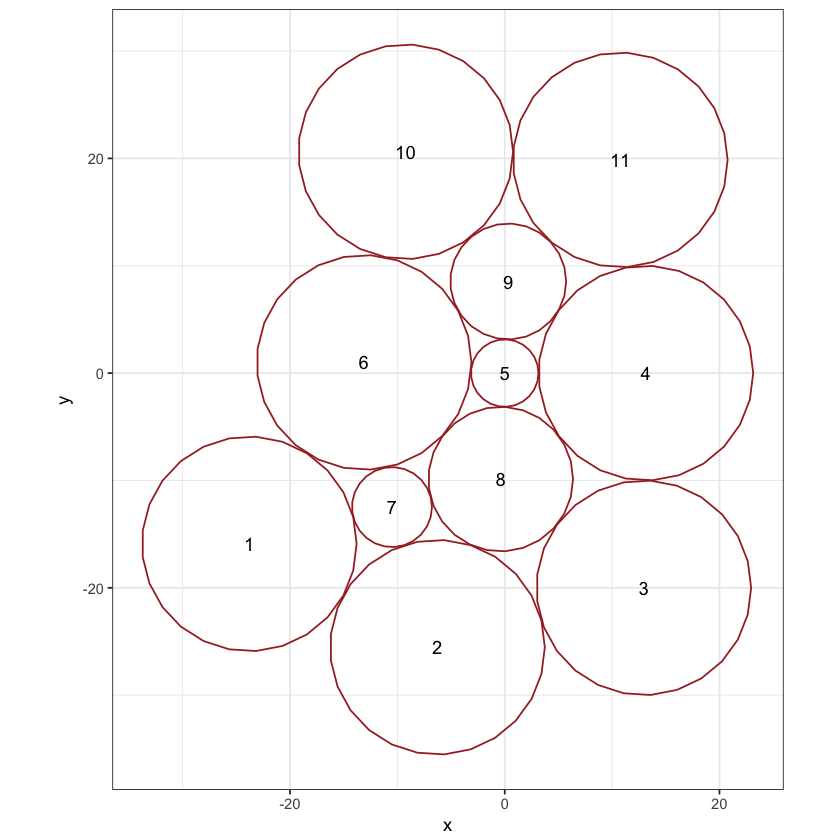

In [5]:
ggplot() +
  geom_polygon(data=plotdat, aes(x, y, group=id), fill=NA, colour="brown") +
  geom_text(data=layout, aes(x, y, label=id)) +
  coord_equal() +
  theme_bw()

Not the best looking thing ever, but it gets the general idea.

### Sunbursts

Sunbursts show a hierarchical structure in a circular layout, with each ring outward representing a deeper level of the hierarchy. 

While sunbursts share some of the disadvantages of pie charts and are not well-suited to precise size comparisons, they do allow notable segments of a complex, multi-layered hierarchy to be quickly identified to guide further action.

![alt text](https://github.com/ByteAcademyCo/advanced-dv/blob/master/sunburst.jpg?raw=true "Logo Title Text 1")

### Word Clouds
 
A word cloud is a visual representation of text data, typically used to depict keyword metadata (tags) on websites, or to visualize free form text. 

We begin by importing the needed python modules:

In [1]:
import os
from wordcloud import WordCloud

Recall that we can use the `os` module to read the text to generate the word cloud:


In [2]:
d = os.getcwd()
text = open(os.path.join(d, 'constitution.txt')).read()

Now, we actually generate a word cloud with the `generate()` method:

In [3]:
wordcloud = WordCloud().generate(text)

Using matplotlib, we'll now generate the actual image:

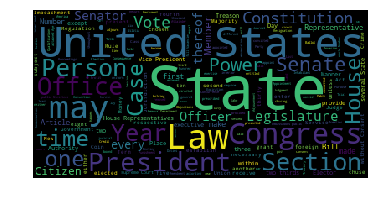

In [4]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

You can customize the font size:

In [5]:
wordcloud = WordCloud(max_font_size=40).generate(text)

And finally, let's see what we've made:

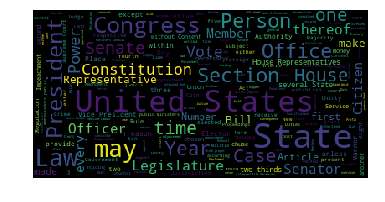

In [6]:
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Final Words

And that wraps up the Advanced Data Visualization portion of this course! As you can see, there are plenty of methods you can choose to visualize your data. This process definitely requires technical skills, but also a bit of creativity and intuition. 

Next up, we'll go into Exploratory Analysis with Data Visualization. 

### Resources

Obviously this tutorial doesn't encompass everything there is to learn about Data Visualization. Here are some resources I recommend for learning more:

[DataQuest](https://www.dataquest.io/dashboard) <br>
[Python DV Cookbook](https://www.dropbox.com/s/iybhvjblkjymnw7/Python%20Data%20Visualization%20Cookbook%20-%20Milovanovic%2C%20Igor-signed.pdf?dl=0)